In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
diabetic_data = pd.read_csv(r"C:\Users\Shivani\OneDrive\Desktop\sem2 set dataset\diabetes.csv")
diabetic_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
print(diabetic_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
print(diabetic_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
diabetic_data.shape

(768, 9)

In [8]:
diabetic_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetic_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
 diabetic_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
X=diabetic_data.drop(columns='Outcome',axis=1)
Y=diabetic_data['Outcome']

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
standardized_data = scaler.transform(X)

In [17]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [18]:
X=standardized_data
Y=diabetic_data['Outcome']

In [19]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


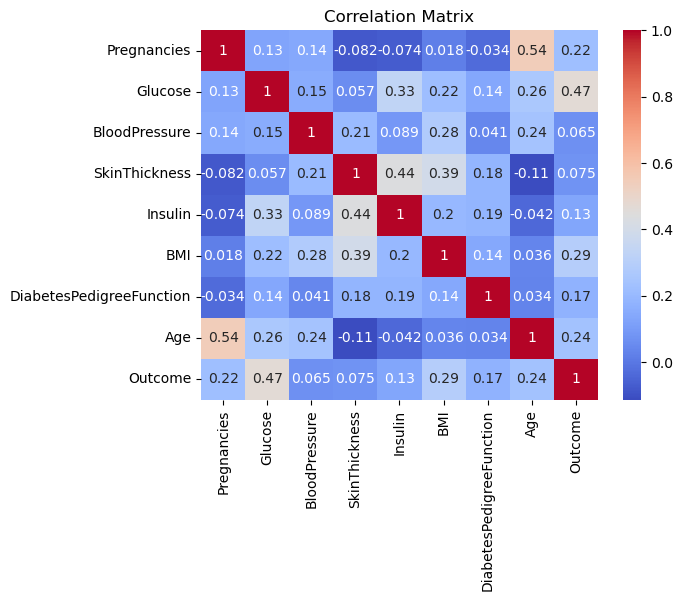

In [48]:
correlation_matrix = diabetic_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()





Fitting 5 folds for each of 81 candidates, totalling 405 fits
Accuracy: 0.7012987012987013
Confusion Matrix: [[81 20]
 [26 27]]
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.80      0.78       101
           1       0.57      0.51      0.54        53

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



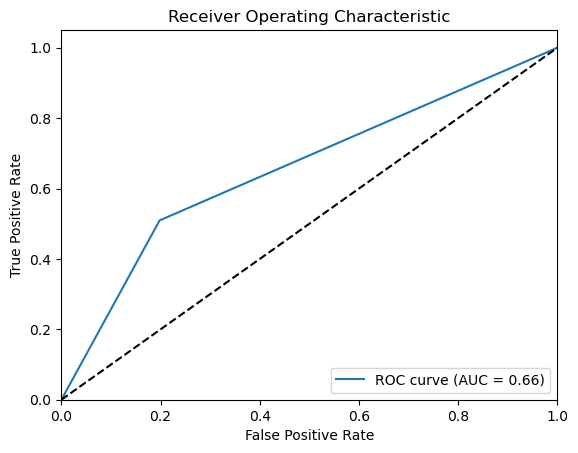

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Split the data into input features (X) and target variable (y)
X = diabetic_data.drop('Outcome', axis=1)
y = diabetic_data['Outcome']

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Handling imbalanced data using SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Initialize the classifiers
rf = RandomForestClassifier(random_state=50)

# Hyperparameter tuning
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate the model on test data
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:", conf_matrix)
print("Classification Report:", class_report)

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier

X = diabetic_data.drop('Outcome', axis=1)
y = diabetic_data['Outcome']
#Feature Selection
selector = SelectKBest(f_classif, k=6)
selector.fit(X, y)
X = selector.transform(X)
#Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Imbalanced data handling
oversample = RandomOverSampler(sampling_strategy='minority')
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train, y_train = undersample.fit_resample(X_train, y_train)
#Initialize the classifiers with tuned hyperparameters
log_reg = LogisticRegression(C=0.1, max_iter=1000, penalty='l2', solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
svm = SVC(C=1.0, kernel='rbf', gamma='scale')
#Ensemble Learning with VotingClassifier
ensemble_clf = VotingClassifier(estimators=[('log_reg', log_reg), ('knn', knn), ('dt', dt), ('rf', rf), ('svm', svm)], voting='hard')
#Train and test the classifiers
classifiers = [log_reg, knn, dt, rf, svm,ensemble_clf]
accuracies = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
#Print the accuracies
for i in range(len(classifiers)):
    print(classifiers[i].__class__.__name__ + ': ' + str(accuracies[i]))


LogisticRegression: 0.6753246753246753
KNeighborsClassifier: 0.6753246753246753
DecisionTreeClassifier: 0.6688311688311688
RandomForestClassifier: 0.7337662337662337
SVC: 0.7012987012987013
VotingClassifier: 0.7272727272727273


In [24]:
classfier = SVC(kernel='linear')

In [25]:
classfier.fit(X_train,Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [802, 614]

In [ ]:
X_train_prediction = classfier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [26]:
print("accuracy score on training data:," , training_data_accuracy)

NameError: name 'training_data_accuracy' is not defined

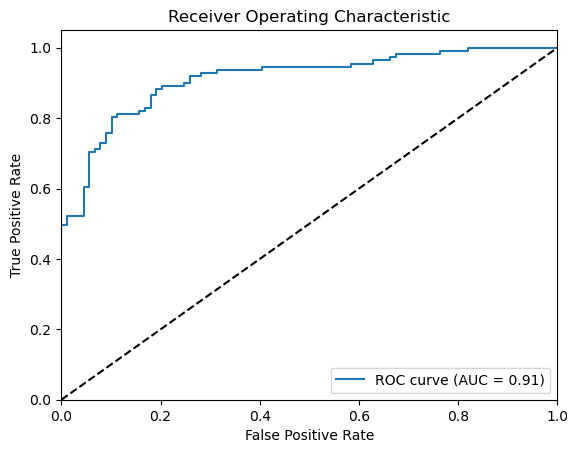

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Generate random data for demonstration (replace with your own data)
X, Y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a logistic regression model (replace with your own model)
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict probabilities for the positive class
Y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(Y_test, Y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Accuracy: 0.7467532467532467
Confusion Matrix: [[75 24]
 [15 40]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



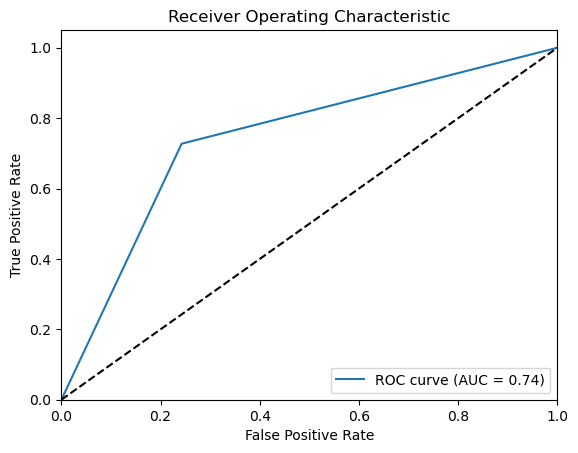

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate the model on test data
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:", conf_matrix)
print("Classification Report:", class_report)
# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
X_test_prediction = classfier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print("test data accuracy:",test_data_accuracy)

In [ ]:
input_data=(4,110,92,0,0,37.6,0.191,30)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classfier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
    print("non diabetic")
else:
    print("diabetic")

In [ ]:
import streamlit

In [ ]:
import pickle

In [ ]:
filename='trainedmodel2.sav'
pickle.dump(classfier,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open('trainedmodel2.sav','rb'))

In [ ]:
input_data=(5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
    print("non diabetic")
else:
    print("diabetic")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Generate random data for demonstration (replace with your own data)
X, Y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a logistic regression model (replace with your own model)
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict probabilities for the positive class
Y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(Y_test, Y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [5]:
df = pd.read_csv(r"C:\Users\Shivani\OneDrive\Desktop\sem2 set dataset\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
import numpy as np
df['Glucose']=np.where(df['Glucose']==0,df['Glucose'].median(),df['Glucose'])
df['Insulin']=np.where(df['Insulin']==0,df['Insulin'].median(),df['Insulin'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,30.5,33.6,0.627,50,1
1,1,85.0,66,29,30.5,26.6,0.351,31,0
2,8,183.0,64,0,30.5,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


In [10]:
X=df.drop('Outcome',axis=1)
Y=df['Outcome']

In [11]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0             72             35     30.5  33.6   
1              1     85.0             66             29     30.5  26.6   
2              8    183.0             64              0     30.5  23.3   
3              1     89.0             66             23     94.0  28.1   
4              0    137.0             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0             76             48    180.0  32.9   
764            2    122.0             70             27     30.5  36.8   
765            5    121.0             72             23    112.0  26.2   
766            1    126.0             60              0     30.5  30.1   
767            1     93.0             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=33)

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
prediction=classifier.predict(X_test)

In [19]:
Y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,prediction))
print(classification_report(Y_test,prediction))
print(accuracy_score(Y_test,prediction))

[[85 14]
 [33 22]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        99
           1       0.61      0.40      0.48        55

    accuracy                           0.69       154
   macro avg       0.67      0.63      0.63       154
weighted avg       0.68      0.69      0.68       154

0.6948051948051948


In [31]:
#manual hyperparameter tuning
model=RandomForestClassifier(n_estimators=200,criterion='gini',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,Y_train)
predictions=model.predict(X_test)

In [32]:
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test,predictions))

[[87 12]
 [27 28]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        99
           1       0.70      0.51      0.59        55

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154

0.7467532467532467


In [40]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
n_estimators
max_features=['auto',"sqrt", "log2"]
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [41]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
select_feature=SelectKBest(chi2,k=5).fit(X_train,Y_train)
print(X_train.columns)

ValueError: Input X must be non-negative.

In [2]:
import pandas as pd
df= pd.read_csv(r"C:\Users\Shivani\OneDrive\Desktop\sem2 set dataset\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
col_names=df.iloc[:,:9]

In [7]:
col_names

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
zero=(df.iloc[:,1:8]==0).sum()
zero

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [9]:
import numpy as np
df.iloc[:,1:8]=df.iloc[:,1:8].replace(0,np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
df.Glucose=df["Glucose"].fillna(df["Glucose"].mean())

In [11]:
df.BloodPressure=df.BloodPressure.fillna(df.BloodPressure.mean())

In [12]:
df.SkinThickness=df.SkinThickness.fillna(df.SkinThickness.mean())

In [13]:
df.Insulin=df.Insulin.fillna(df.Insulin.mean())

In [14]:
df.BMI=df.BMI.fillna(df.BMI.mean())

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
450,1,82.0,64.000000,13.00000,95.000000,21.200000,0.415,23,0
665,1,112.0,80.000000,45.00000,132.000000,34.800000,0.217,24,0
230,4,142.0,86.000000,29.15342,155.548223,44.000000,0.645,22,1
143,10,108.0,66.000000,29.15342,155.548223,32.400000,0.272,42,1
177,0,129.0,110.000000,46.00000,130.000000,67.100000,0.319,26,1
346,1,139.0,46.000000,19.00000,83.000000,28.700000,0.654,22,0
121,6,111.0,64.000000,39.00000,155.548223,34.200000,0.260,24,0
443,8,108.0,70.000000,29.15342,155.548223,30.500000,0.955,33,1
145,0,102.0,75.000000,23.00000,155.548223,32.457464,0.572,21,0
697,0,99.0,72.405184,29.15342,155.548223,25.000000,0.253,22,0


In [17]:
#checking if it is imbalanced or not
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
X=df.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [19]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model with class weights
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[82 17]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [21]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Alternatively, suppress only specific warnings
# warnings.filterwarnings("ignore", category=UserWarning)  # Example for UserWarnings


In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = LogisticRegression()

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'class_weight': [None, 'balanced']  # Class weights
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='f1',  # Using F1 score for evaluation
                           cv=5,          # 5-fold cross-validation
                           verbose=2,     # Print detailed logs
                           n_jobs=-1)     # Use all available cores

# Fit Grid Search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
print("Best Hyperparameters:", grid_search.best_params_)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
[[70 29]
 [16 39]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



In [31]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load your dataset
# Assuming 'df' is your dataset and 'Outcome' is the target column
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine Classifier
svm_model = SVC(class_weight='balanced')  # Use class weights to handle class imbalance

# Define the parameter grid for Grid Search for SVM
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernels to try
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’
}

# Initialize GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=svm_model, 
                                param_grid=svm_param_grid, 
                                scoring='f1', 
                                cv=5, 
                                verbose=2, 
                                n_jobs=-1)

# Fit Grid Search on the training data for SVM
svm_grid_search.fit(X_train_scaled, y_train)

# Get the best model from Grid Search for SVM
best_svm_model = svm_grid_search.best_estimator_

# Make predictions on the test set using SVM
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluate the SVM model
print("Best SVM Hyperparameters:", svm_grid_search.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced')  # Use class weights to handle class imbalance

# Define the parameter grid for Grid Search for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, 
                               param_grid=rf_param_grid, 
                               scoring='f1', 
                               cv=5, 
                               verbose=2, 
                               n_jobs=-1)

# Fit Grid Search on the training data for Random Forest
rf_grid_search.fit(X_train, y_train)

# Get the best model from Grid Search for Random Forest
best_rf_model = rf_grid_search.best_estimator_

# Make predictions on the test set using Random Forest
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best SVM Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy: 0.7207792207792207
[[68 31]
 [12 43]]
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        99
           1       0.58      0.78      0.67        55

    accuracy                           0.72       154
   macro avg       0.72      0.73      0.71       154
weighted avg       0.75      0.72      0.73       154

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.7597402597402597
[[74 25]
 [12 43]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        99
           1       0.63      0.78      0.70        55

    accuracy                           0.76       154
   macro avg       0.75 

In [32]:
pip install xgboost

     -------------------------------------- 124.9/124.9 MB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load your dataset
# Assuming 'df' is your dataset and 'Outcome' is the target column
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier with class weights
xgb_model = XGBClassifier(scale_pos_weight=len(y[y == 0]) / len(y[y == 1]), eval_metric='mlogloss', use_label_encoder=False)

# Define the parameter grid for Grid Search
xgb_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7, 9],  # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.5, 0.7, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.7, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, 
                                param_grid=xgb_param_grid, 
                                scoring='f1', 
                                cv=5, 
                                verbose=2, 
                                n_jobs=-1)

# Fit Grid Search on the training data
xgb_grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_xgb_model = xgb_grid_search.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("Best XGBoost Hyperparameters:", xgb_grid_search.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best XGBoost Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
XGBoost Accuracy: 0.7402597402597403
[[69 30]
 [10 45]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.78        99
           1       0.60      0.82      0.69        55

    accuracy                           0.74       154
   macro avg       0.74      0.76      0.73       154
weighted avg       0.78      0.74      0.75       154

